# Interpolation and Optimization

**1. Generate N=10 univariate, uniformly distributed random numbers**

In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy import optimize
%matplotlib inline

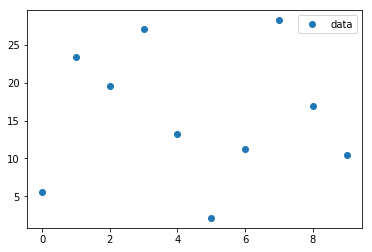

In [2]:
# y function
def f(x):
    noise = random.uniform(0.1, 10.0, len(x))
    return (np.cos(x) + 3*noise)

# initial N=10 x values
x_orig = np.linspace(0,10,num=10,endpoint=False)

# plot y
y_orig = f(x_orig)
plt.plot(x_orig,y_orig,'o')
plt.legend(['data'],loc='best')
plt.show()

**2. Interpolate that sequence with $N_i=100$ points, using cubic interpolation, using the _interp1d_ class**

In [3]:
# x points for interpolation
x_new = np.linspace(0,10,num=100,endpoint=True)

# linear interpolation
f_linear = interpolate.interp1d(x_orig,y_orig,bounds_error=False)
y_lin = f_linear(x_new)

# cubic interpolation
f_cubic = interpolate.interp1d(x_orig,y_orig,kind='cubic',bounds_error=False)
y_cubic = f_cubic(x_new)

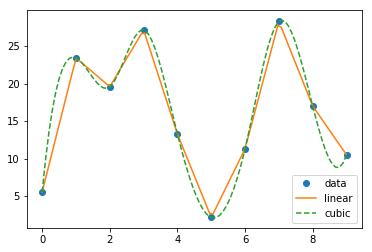

In [4]:
# plot the interpolation function
plt.plot(x_orig,y_orig,'o',x_new,y_lin,'-',x_new,y_cubic,'--')
plt.legend(['data','linear','cubic'],loc='best')
plt.show()

## Optimization

[28.43550893852203, 2.0823130943619979]


Text(0.5,1,'minimize')

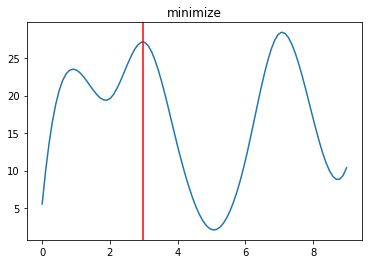

In [5]:
# find maxima using optimize, multiply the function by -1 to get the maxima
opt = optimize.minimize(lambda x: -1*f_cubic(x), 4, method='BFGS')
plt.plot(x_new, y_cubic)
print([max(y_cubic),min(y_cubic)])
plt.axvline(opt.x, color='r')
plt.title('minimize')

7
     fun: -28.44045204322687
    nfev: 11
     nit: 10
 success: True
       x: 7.0857399314313936


Text(0.5,1,'minimize_scalar')

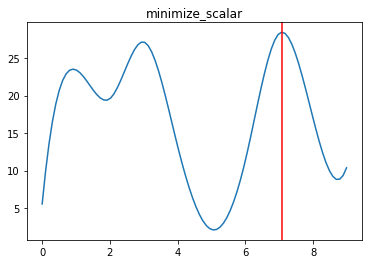

In [6]:
lower = np.linspace(2, 7, num=10)
upper = lower + 1
sols = [optimize.minimize_scalar(lambda x: -1*f_cubic(x), bracket=(l, u)) for (l, u) in zip(lower, upper)]
#print(sols)
idx = np.argmin([sol.fun for sol in sols])
print(idx)
sol = sols[idx]
print(sol)

plt.plot(x_new, y_cubic)
plt.axvline(sol.x, color='r');
plt.title('minimize_scalar')

                        fun: -27.157619574609306
 lowest_optimization_result:       fun: -27.157619574609306
 hess_inv: array([[ 0.02458905]])
      jac: array([  7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([ 2.97294579])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 2334
                        nit: 100
                       njev: 777
                          x: array([ 2.97294579])


Text(0.5,1,'basinhopping')

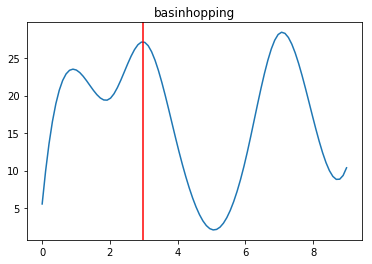

In [7]:
sol = optimize.basinhopping(lambda x: -1*f_cubic(x),4,stepsize=1)
print(sol)
plt.plot(x_new, y_cubic)
plt.axvline(sol.x, color='r')
plt.title('basinhopping')